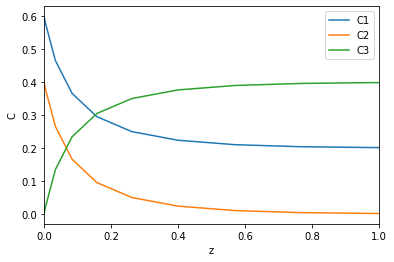

In [4]:
import scipy.constants as const

# function for the Arrhenius equation
def arrh(A, Ea, T): 
    return A * math.exp(-Ea/(const.R * T))

# temperature dependent reaction kinetics
def simple_reaction_3(C, k, T):
    r = arrh(k[0], k[1], T) * C[0] * C[1]
    return [-r, -r, r]

# function to calculate enthalpy change due to reaction
# here an extremely simple model is assumed, but a more sophisticated model could be used easily
def calc_DeltaH(r):
    H_A = 0.
    H_B = -100.
    H_C = -300.
    return -r[0] * H_A - r[1] * H_B + r[2] * H_C

# adiabatic plug flow reactor model
def adiabatic_plug_flow_reactor(z, Y, u, model_param, reaction_model, rho, Cp):
    C = Y[0:2]
    T = Y[3]
    r = reaction_model(C, model_param, T)
    deltaH = calc_DeltaH(r)
    # temperature change due to reaction
    dT = r[0] * deltaH / (u * rho * Cp)
    # concentration changes for the components
    dC = [rr / u for rr in r]
    # assemble the vector dY
    dY = dC
    dY.append(dT)
    return dY

k_3 = (100., 200.0)
rho = 900.
Cp = 4.
C0_2 = [0.6, 0.4, 0.0, 300.0]

sol = solve_ivp(adiabatic_plug_flow_reactor, span, C0_2, args = (u, k_3, simple_reaction_3, rho, Cp))

plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["C1", "C2", "C3"])
plt.xlim((0., 1.0))
plt.show()

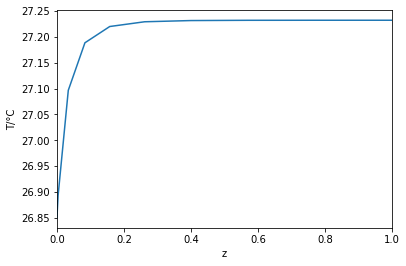

In [5]:
# convert temparature from K to °Cs
TinC = [t - 273.15 for t in sol.y[3,:]]
plt.plot(sol.t, TinC)
plt.xlabel("z")
plt.ylabel("T/°C")
plt.xlim((0., 1.0))
plt.show()